In [ ]:
%pip install control

In [3]:
import numpy as np
import control as ct
import control.flatsys as fs
import matplotlib.pyplot as plt

Define a nonlinear system

In [4]:
def nonlinear_sys(t, x, u, params=(None)):
  xdot = np.sin(x) + u
  return xdot

def nonlinear_sys_out(t, x, u, params=(None)):
  y = x
  return y

Creating a nonlinear input-output system using control library.

In [5]:
sys_1 = ct.NonlinearIOSystem(nonlinear_sys, nonlinear_sys_out)

Simulating the response of the system

In [6]:
t = np.linspace(0, 10, 1000)
u = np.ones_like(t) * 0 
t_out, y_out = ct.input_output_response(sys_1, T=t, U=u, X0=[1])

Plot out the data

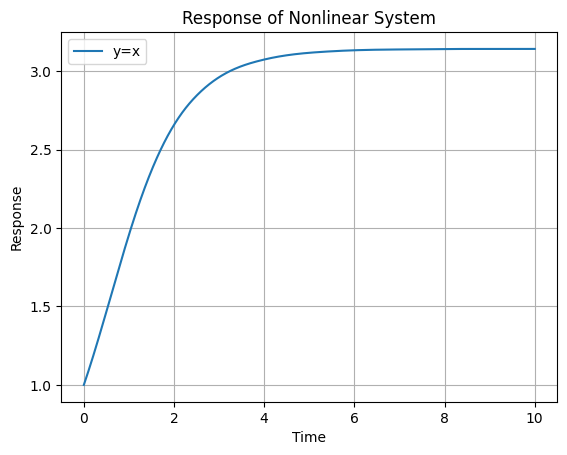

In [7]:
# Plot the response
plt.plot(t_out, y_out[0], label='y=x')  # theta output
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Response of Nonlinear System')
plt.legend()
plt.grid(True)
plt.show()

Find the equilibrium point of the system 

In [8]:
# Find the equilibrium point of the system
equilibrium = ct.find_eqpt(sys_1, [3], [0])
print("Equilibrium point:", equilibrium)

Equilibrium point: (array([3.14159265]), [0])


Linearize the system at its equilibrium point

In [9]:
linearized_sys = ct.linearize(sys_1,[1.5],[0])

Simulate the linearized system

In [10]:
# Simulate the system
t = np.linspace(0, 5, 1000)
u = np.ones_like(t) * 0 
t_out, y_out = ct.input_output_response(linearized_sys, T=t, U=u, X0=[1])

Plotting

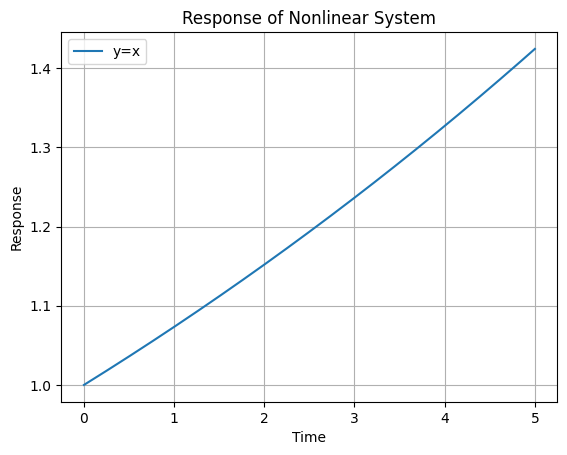

In [11]:
# Plot the response
plt.plot(t_out, y_out, label='y=x')  # theta output
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Response of Nonlinear System')
plt.legend()
plt.grid(True)
plt.show()

Verifying the System with its matrix A. 

In [12]:
A_matrix = linearized_sys.A

print("System matrix A:")
print(A_matrix)

System matrix A:
[[0.0707367]]
